<a href="https://colab.research.google.com/github/Sanjay-sundaresan/BZ/blob/main/A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read Data

In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [178]:
!pip install unrar

In [179]:
from google.colab import drive
drive.mount("/content/gdrive",force_remount=True)

Mounted at /content/gdrive


In [180]:
!unrar x "/content/gdrive/MyDrive/DATA/test.rar"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/gdrive/MyDrive/DATA/test.rar


Would you like to replace the existing file 2022_02_08-02_30_31_AM.csv
1486640066 bytes, modified on 2022-02-07 21:01
with a new one
1486640066 bytes, modified on 2022-02-07 21:01

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit Y

Extracting  2022_02_08-02_30_31_AM.csv                                     9% 19% 28% 38% 47% 57% 66% 76% 85% 95% 99%  OK 
All OK


In [181]:
df = pd.read_csv("2022_02_08-02_30_31_AM.csv")

In [182]:
df.head()

,uuid,price_string,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,11.50,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw


In [183]:
df.tail()

,uuid,price_string,price_string_unf,product_type,level_1,category
13729995,2a13338e-9268-4f7b-9e7c-b8c41c72971b,NaN,NaN,RHJlc3Nlcw,TWF4aSBkcmVzcw,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
13729996,fcaedae7-dc20-4da1-b4ae-77368c973088,$69.99,NaN,Um9vbSBkZWNvcg,UGxhbnRlcnMvVmFzZXM,SG91c2Vob2xkIGFuZCBDbGVhbmluZw
13729997,679f073a-862a-4e43-b5ce-41e45afd3bfa,NaN,NaN,UGV0IEZvb2Q,RHJ5IERvZyBGb29k,cGV0IHN1cHBsaWVz
13729998,25677eee-c26b-4abf-bd10-ca77a800ba26,NaN,NaN,U2F1Y2U,QkJRIFNhdWNl,Z3JvY2VyaWVz
13729999,0f4550de-1f33-48b5-a5ef-fc5e39df208e,$55.00,NaN,TG9hZmVycy8gT3hmb3Jkcw,d29tZW5zIE94Zm9yZHMgYW5kIExvYWZlcnM,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz


# Exploratory Data Analysis

In [184]:
df.describe()

,uuid,price_string,price_string_unf,product_type,level_1,category
count,13730000,5510000,310000,13720000,13680000,13720000
unique,1373,248,26,321,595,13
top,638744a4-b0ae-4166-8cb6-5c063c862036,$0.00,$6.75,U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM,U3dlYXRzaGlydA,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
freq,10000,240000,30000,200000,90000,3910000


So, there are 321 different product types, 595 classifications and 13 categories in the dataset. Since the field 'uuid' is specified as a primary key, and there are only 1373 unique 'uuid' values, there might be some necessity for cleaning/preprocessing. 

In [185]:
df.isnull().sum()

uuid                       0
price_string         8220000
price_string_unf    13420000
product_type           10000
level_1                50000
category               10000
dtype: int64

It can be concluded that although 'uuid' has no null records, there is a lot of repeatability. 

In [186]:
#Removing duplicate values
df.drop_duplicates(inplace = True)

In [187]:
df.describe()

,uuid,price_string,price_string_unf,product_type,level_1,category
count,1373,551,31,1372,1368,1372
unique,1373,248,26,321,595,13
top,638744a4-b0ae-4166-8cb6-5c063c862036,$0.00,$6.75,U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM,U3dlYXRzaGlydA,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
freq,1,24,3,20,9,391


In [188]:
df.isnull().sum()

uuid                   0
price_string         822
price_string_unf    1342
product_type           1
level_1                5
category               1
dtype: int64

The dataset has been simplified to a large extent 

# Cleaning and Preprocessing



First, the products which have price field empty, but 'Price_unfiltered' string non-empty must be taken into account, and the numerical value alone must be filtered through as the price. 

In [189]:
#find records with empty price field and check if the corresponding price_unfiltered field has values
dfnew = df.loc[(df["price_string"].isna() == True) & (df["price_string_unf"].isna() == False)] 

In [190]:
#Checking if price_string_unf has a usable price value
dfnew = dfnew[(dfnew["price_string_unf"].str.count('\$') == 1) | (dfnew["price_string_unf"].str.count('€') == 1) | (dfnew["price_string_unf"].str.count('£') == 1)]

In [191]:
dfnew.describe()  

,uuid,price_string,price_string_unf,product_type,level_1,category
count,5,0,5,5,5,5
unique,5,0,5,4,5,2
top,13724827-979f-4019-9ff1-b44e57af5802,NaN,Current price: \n$359.00,U3Ryb2xsZXJzL0NhciBzZWF0cy8gQWNjZXNzb3JpZXM,Q2FyIHNlYXRz,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
freq,1,NaN,1,2,1,3


Now, fill in the salvageable prices

In [192]:
dfnew['price_string'] = dfnew['price_string_unf'].str.extract('([$€£]{1}\d+)', expand=False) 

In [193]:
dfnew.describe()

,uuid,price_string,price_string_unf,product_type,level_1,category
count,5,5,5,5,5,5
unique,5,5,5,4,5,2
top,13724827-979f-4019-9ff1-b44e57af5802,$359,Current price: \n$359.00,U3Ryb2xsZXJzL0NhciBzZWF0cy8gQWNjZXNzb3JpZXM,Q2FyIHNlYXRz,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
freq,1,1,1,2,1,3


In [194]:
dfnew

,uuid,price_string,price_string_unf,product_type,level_1,category
61,13724827-979f-4019-9ff1-b44e57af5802,$359,Current price: \n$359.00,U3Ryb2xsZXJzL0NhciBzZWF0cy8gQWNjZXNzb3JpZXM,Q2FyIHNlYXRz,QmFieWNhcmU
208,51bd7faa-718b-494b-89e0-1a59891da07b,$41,$41 USD,TWF0ZXJuaXR5IFRzaGlydA,TWF0ZXJuaXR5IFNob3J0IHNsZWV2ZSB0ZWU,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
434,22c4b6af-6809-4ea1-9f1c-802a19246025,$329,Current price: \n$329.40,U3Ryb2xsZXJzL0NhciBzZWF0cy8gQWNjZXNzb3JpZXM,U3Ryb2xsZXJz,QmFieWNhcmU
637,548a7381-b382-41db-bf06-4dae79857d87,$85,$85 USD,TWF0ZXJuaXR5IFdlYXI,TWF0ZXJuaXR5IFNraXJ0,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
2321,2441f06d-3590-443c-9353-f2f06087d61b,$80,$80 USD,TWF0ZXJuaXR5IERyZXNz,TWF0ZXJuaXR5IFBhcnR5IERyZXNz,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz


In [195]:
df.set_index('uuid', inplace=True)
df.update(dfnew.set_index('uuid'))
df.reset_index(inplace = True)

In [196]:
df.describe()

,uuid,price_string,price_string_unf,product_type,level_1,category
count,1373,556,31,1372,1368,1372
unique,1373,250,26,321,595,13
top,638744a4-b0ae-4166-8cb6-5c063c862036,$0.00,$6.75,U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM,U3dlYXRzaGlydA,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
freq,1,24,3,20,9,391


The data is now ready for processing 

# 1. Products without prices

In [197]:
prod_wop = df[df['price_string'].isnull()]

In [198]:
prod_wop

,uuid,price_string,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw
5,389d9f75-cc3f-4bd2-94f7-93e381a3bed5,NaN,NaN,TmF0dXJhbCBTd2VldGVuZXJzLyBTdWdhcg,TW9uayBGcnVpdA,Z3JvY2VyaWVz
12,1f2766ec-0a27-43f8-b28b-77a44492ead1,NaN,NaN,U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM,U2NydWJz,SG91c2Vob2xkIGFuZCBDbGVhbmluZw
15,7bad39f5-74b9-4611-afb9-46fb135190cd,NaN,NaN,UGx1cyBzaXplIHdlYXIgZHJlc3M,RHJlc3M,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
...,...,...,...,...,...,...
1364,c174d758-aa8f-4c1c-afa9-2ded6e6b6a0d,NaN,NaN,VGVh,VGVhYmFncw,Z3JvY2VyaWVz
1365,0c4f4319-4a18-4edc-a40d-133b3f4cef5c,NaN,NaN,QnJ1c2hlcw,RGlzaCBicnVzaA,SG91c2Vob2xkIGFuZCBDbGVhbmluZw
1367,2d4deea7-b7c2-4342-8488-337c5eacaa84,NaN,NaN,bWVucyBzd2VhdGVycw,SG9vZGll,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
1370,62785956-705e-47db-bd0e-764575333724,NaN,NaN,TWF0ZXJuaXR5IFRzaGlydA,TWF0ZXJuaXR5IFNob3J0IHNsZWV2ZSB0ZWU,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz


In [199]:
prod_wp = df[df['price_string'].isnull() == 0]

In [200]:
prod_wp #products with prices

,uuid,price_string,price_string_unf,product_type,level_1,category
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,11.50,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw
6,9599f1a9-d406-43eb-89f5-9b1c0af1ac9a,$24.99,NaN,TW9wcyBhbmQgYnJvb21z,TW9w,SG91c2Vob2xkIGFuZCBDbGVhbmluZw
7,35799087-f6f4-4ca2-abfe-cbb5c27d2f1a,$148.00,NaN,V29tZW5zIFBhbnRz,V29tZW5zIFJlZ3VsYXIvQ2FzdWFsIFBhbnRz,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
...,...,...,...,...,...,...
1362,edd8e3f9-fed5-4513-a3b1-ec2914e4a3ee,$80.00,NaN,RHJlc3Nlcw,Q2FzdWFsIGRyZXNz,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
1366,277d470c-01c0-4969-9b20-9bde574d3352,$69.99,NaN,V2F0ZXIgRmlsdGVyIERpc3BlbnNlcg,NSBHYWxsb24,VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ
1368,a1170e06-ec36-4530-82a2-0374969a059e,$14.49,NaN,Q29va2luZyBPaWw,Q29jb251dCBPaWw,Z3JvY2VyaWVz
1369,b282d3e4-9d7a-48c9-9d68-4856c51f545b,$12.99,NaN,UGV0IFNoYW1wb28vQ29uZGl0aW9uZXI,UHVwcHkgU2hhbXBvbw,cGV0IHN1cHBsaWVz


# 2. Count of products without prices and with prices in each Product Type, Category, Level 1

In [201]:
#Grouping and counting products without prices
res = prod_wop.groupby(['product_type','category','level_1']).count().reset_index()
res = res.loc[:,['product_type','category','level_1','uuid']]
res.columns = ["Product Type", "Category","level_1","Count of Products without prices"]

In [202]:
#Grouping and counting products with prices
res2 = prod_wp.groupby(['product_type','category','level_1']).count().reset_index()
res2 = res2.loc[:,['product_type','category','level_1','uuid']]
res2.columns = ["Product Type", "Category","level_1","Count of Products with prices"]

In [203]:
res = pd.merge(res, res2)
res['Count of Products without prices'] = res['Count of Products without prices'].astype(int)
res['Count of Products with prices'] = res['Count of Products with prices'].astype(int)
res

,Product Type,Category,level_1,Count of Products without prices,Count of Products with prices
0,Q29mZmVlIEJlYW5z,Z3JvY2VyaWVz,RGFyayBSb2FzdA,2,1
1,Q29mZmVlIEJlYW5z,Z3JvY2VyaWVz,TGlnaHQgUm9hc3Q,1,1
2,Q29mZmVlIEJlYW5z,Z3JvY2VyaWVz,TWVkaXVtIFJvYXN0,2,1
3,Q29uZGl0aW9uZXIgSGFpcg,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,Q29uZGl0aW9uZXI,2,1
4,Q29va2luZyBPaWw,Z3JvY2VyaWVz,Q29jb251dCBPaWw,1,2
...,...,...,...,...,...
252,d29tZW5zIE91dGVyd2Vhcg,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,V29tZW5zIFBhcmthcw,1,2
253,d29tZW5zIFdhbGxldA,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,d29tZW5zIFdhbGxldA,1,2
254,d29tZW5zIHN3ZWF0ZXJz,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,SG9vZGll,2,1
255,d29tZW5zIHN3ZWF0ZXJz,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,U3dlYXRlcg,2,1


# 3. Correct Product Prices in the correct format (eg: $56) wherever possible and separate them into currency and value columns.

In [204]:
df.loc[:,'price_string'] = df.loc[:,'price_string'].replace('[\$,]', 'USD', regex=True)
#Various other currencies can be represented using the appropriate regex

In [205]:
df['currency'] = df['price_string'].str.extract('([A-Za-z]+)')
df['price_string'] = df['price_string'].str.replace('([A-Za-z]+)', '')
df['price_string'] = df['price_string'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [206]:
df = df.reindex(columns=['uuid', 'price_string', 'currency', 'price_string_unf','product_type','level_1','category'])
df.columns = ['uuid','price','currency','price_string_unf','product_type','level_1','category']

In [207]:
df.describe()

,price
count,556.000000
mean,71.007140
std,109.557517
min,0.000000
25%,11.997500
50%,34.000000
75%,89.000000
max,1198.000000


In [208]:
df

,uuid,price,currency,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,NaN,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw
2,acbd66ff-79f8-467a-91f9-108a45af5626,19.95,USD,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo
3,963915d6-b2e3-4098-b242-9410593cf205,92.00,USD,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,11.50,NaN,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw
...,...,...,...,...,...,...,...
1368,a1170e06-ec36-4530-82a2-0374969a059e,14.49,USD,NaN,Q29va2luZyBPaWw,Q29jb251dCBPaWw,Z3JvY2VyaWVz
1369,b282d3e4-9d7a-48c9-9d68-4856c51f545b,12.99,USD,NaN,UGV0IFNoYW1wb28vQ29uZGl0aW9uZXI,UHVwcHkgU2hhbXBvbw,cGV0IHN1cHBsaWVz
1370,62785956-705e-47db-bd0e-764575333724,NaN,NaN,NaN,TWF0ZXJuaXR5IFRzaGlydA,TWF0ZXJuaXR5IFNob3J0IHNsZWV2ZSB0ZWU,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
1371,b4799645-56ab-4b83-8666-1b79cbf6da17,NaN,NaN,NaN,WW9nYSBNYXRz,RWNvIGZyaWVuZGx5IHlvZ2EgbWF0cw,SGVhbHRo


# 4.List out the categories with average price of product.

In [209]:
cat_ap = df.groupby(['category'])['price'].mean().reset_index()
cat_ap.columns = ['category','average price']
cat_ap = cat_ap.sort_values(by=['average price'])

In [210]:
cat_ap

,category,average price
9,Z3JvY2VyaWVz,10.541667
12,cGV0IHN1cHBsaWVz,14.181875
10,a2l0Y2hpbmcgYW5kIGRpbmluZw,16.703235
1,QXJ0IHN1cHBsaWVz,19.471053
11,b2ZmaWNlIHByb2R1Y3Rz,20.480000
6,VG95cyBhbmQgR2FtZXM,32.448947
5,SGVhbHRo,32.557586
8,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,34.745067
3,RWxlY3Ryb25pY3M,60.258182
4,SG91c2Vob2xkIGFuZCBDbGVhbmluZw,76.199000


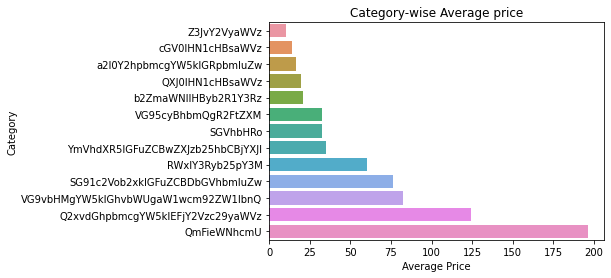

In [211]:
#Graphical representation
sns.barplot( x = 'average price', y = 'category', data = cat_ap)
plt.title('Category-wise Average price')
plt.xlabel('Average Price')
plt.ylabel('Category')
plt.show()